# Trying CNN 

In [12]:
import torch
import pandas as pd
import numpy as np
import torchvision
from torchvision import transforms
import torch.nn.functional as F
from torch.utils.data import DataLoader, Dataset
import time

import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from tqdm import tqdm as tqdm
from IPython.display import clear_output

from Network import *
from TorchMalaria import *

import matplotlib.pyplot as plt
from skimage.transform import resize

torch.set_num_threads(2)

In [2]:
data = DataMalaria("list_of_imagenames_with_label.csv", transform=torchvision.transforms.ToTensor())

In [5]:
batchsize = 200
dataloader = DataLoader(data, batch_size = batchsize, shuffle = True)
len(data)/batchsize

137.79

C:\Users\simcha\Anaconda3\lib\site-packages\skimage\transform\_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


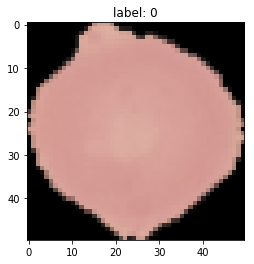

In [4]:
image, label = data[0]
data.imshowsingle(0)

In [5]:
dataIter = iter(dataloader)

batch = next(dataIter)
images, labels = batch
if len(images) < 10:
    # make grid takes tensor as arg
    # tensor : (batchsize, channels, height, width)
    grid = torchvision.utils.make_grid(images)
    fig = plt.figure(figsize=(10, 80))
    plt.imshow(grid.numpy().transpose((1, 2, 0)))
    plt.axis('off')
    plt.title(labels.numpy())
    plt.show()

In [17]:
# initialize network and optimizer
network = Network()
network.double()
optimizer = optim.Adam(network.parameters(), lr = 0.01)

batch = next(iter(dataloader))
images, labels = batch

# forward pass + calculate loss
preds = network(images)
loss = F.cross_entropy(preds.double(), labels)

# backward propagation + updating weights
loss.backward()
optimizer.step()

################################

print("Loss 1: {}".format(loss.item()))
preds = network(images.double())
loss = F.cross_entropy(preds, labels)
print("Loss 2: {}".format(loss.item()))

Loss 1: 0.6914164057144143
Loss 2: 0.6896339899842711


In [14]:
network = Network()
network.double()
optimizer = optim.Adam(network.parameters(), lr = 0.005)

nEpochs = 10
pbar = tqdm(total = np.ceil(len(data)/batchsize)*nEpochs)
for epoch in range(nEpochs):
    totalLoss = 0
    totalCorrect = 0
    t = time.time()
    
    for batch in dataloader:
        images, labels = batch
        
        # forward pass + calculate loss
        preds = network(images)
        loss = F.cross_entropy(preds, labels)

        # PyTorch telt alle gradienten op. Daarom moet de gradient gereset worden.
        optimizer.zero_grad()

        # backward propagation + updating weights
        loss.backward()
        optimizer.step()

        totalLoss += loss.item()
        totalCorrect += GetNumCorrect(preds, labels)
        clear_output()
        pbar.update(1)

    pbar.write("epoch: {}\nTotalCorrect: {}\nTotalLoss: {}\n\nTime: {}\nAccuracy: {}\n\n".format(epoch, totalCorrect, totalLoss, time.time() - t, totalCorrect.item() / len(data)))


epoch: 9
TotalCorrect: 18936
TotalLoss: 80.23534909695138

Time: 370.32934379577637
Accuracy: 0.6871325930764206




  8%|███▏                                 | 35/414.0 [1:29:10<25:20,  4.01s/it]
100%|████████████████████████████████████| 414/414.0 [1:26:47<00:00,  3.03s/it]


100%|██████████████████████████████████| 1380/1380.0 [1:04:17<00:00,  2.57s/it]

  1%|▎                                     | 3/414.0 [1:04:46<18:51,  2.75s/it]

In [10]:
def GetNumCorrect(pred, labels):
    return pred.argmax(dim = 1).eq(labels).sum()

In [15]:
pbar.write("epoch: {}\nTotalCorrect: {}\nTotalLoss: {}\n\nTime: {}\nAccuracy: {}\n\n".format(epoch, totalCorrect, totalLoss, time.time() - t, totalCorrect.item() / len(data)))

epoch: 9
TotalCorrect: 18936
TotalLoss: 80.23534909695138

Time: 370.4342818260193
Accuracy: 0.6871325930764206




  8%|███▏                                 | 35/414.0 [1:29:10<25:20,  4.01s/it]
100%|████████████████████████████████████| 414/414.0 [1:26:47<00:00,  3.03s/it]


100%|██████████████████████████████████| 1380/1380.0 [1:04:17<00:00,  2.57s/it]

  1%|▎                                     | 3/414.0 [1:04:46<18:51,  2.75s/it]

In [26]:
images, labels = batch
preds = network(images)

from sklearn.metrics import confusion_matrix
confusion_matrix(labels, preds.argmax(dim = 1).numpy())

array([[67,  9],
       [17, 65]], dtype=int64)

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0], dtype=int64)